In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.neighbors import NearestNeighbors
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error 
from math import sqrt 
from patsy import dmatrix
import statsmodels.formula.api as smf
sb.set()

<p style="font-size: 50px">CONCEPTUAL</p>
<p>1</p>

<AxesSubplot: xlabel='X'>

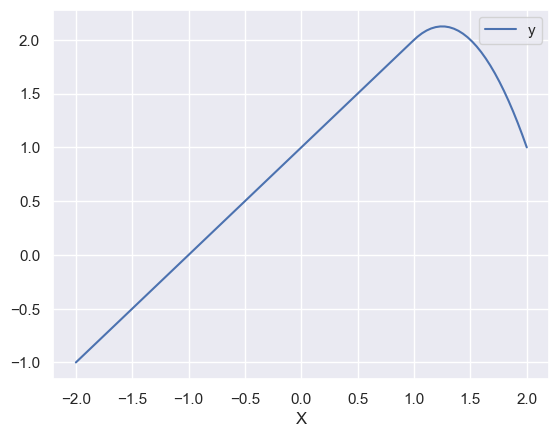

In [3]:
#conceptual 1
X = np.linspace(-2, 2, 100)
df = pd.DataFrame(X, columns = ['X'])
df['y'] = 1 + df['X'] #beta 0
df['y'] += (-2*(df['X']-1)**2)*(df['X']>=1).mul(1)
df.plot(x='X', y='y')

<p>Y intercept: 1<br>
X intercept: none in the specified range.<br>
The curve is linear between X= -2, and X=1 with the equation y=1+x and then turns into a quadratic equation between X=1 and X=2 with the equation of the line being  y=1+x−2(x−1)<sup>2</sup></p>

2

<AxesSubplot: xlabel='X'>

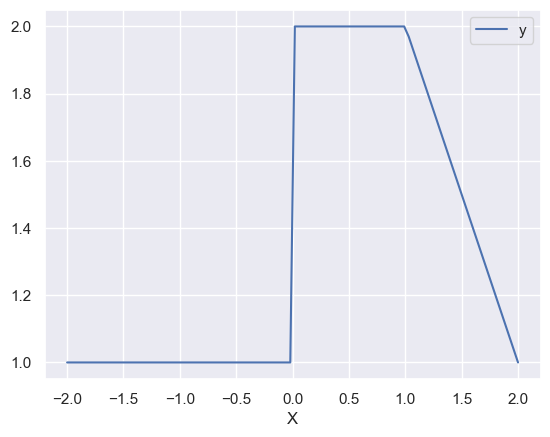

In [4]:
#conceptual 1
X = np.linspace(-2, 2, 100)
df = pd.DataFrame(X, columns = ['X'])


b1 = df['X'].between(0,2,'both').mul(1) - (df['X']-1)*(df['X'].between(1,2,'both').mul(1))
b2 = (df['X']-3)*df['X'].between(3,4,'both').mul(1) + df['X'].between(4,5,'right').mul(1)
df['y'] = 1 + b1 + 3*b2 #beta 0
df.plot(x='X', y='y')

There is a y intercept at Y=1
There are no x intercepts in the given range. 
The slope for this function is 0 for -2 to 0, and 0 to 1.
The slope for this function is extremely high near X=0
The slope of this function is 1+1-(X-1) from 1 to 2.

<p style="font-size:40px">Applied</p>

1.
1a.

Degree with best fit: 3 R^2 value: 0.08355308128270975


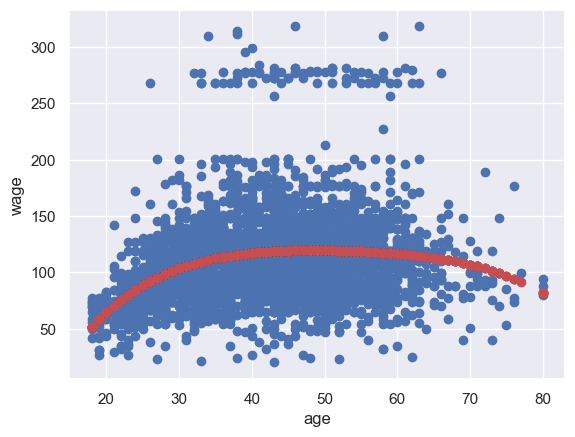

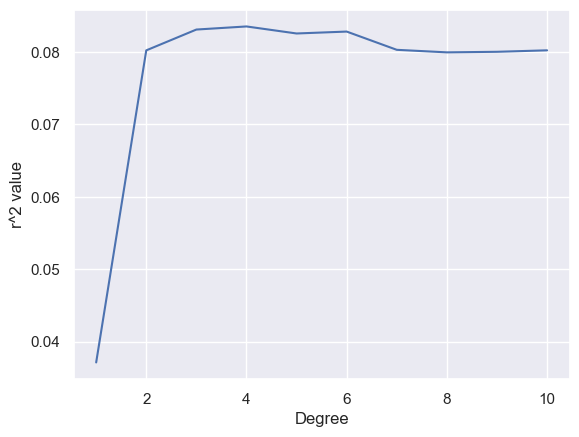

In [5]:
df = pd.read_csv("Wage.csv")
X = df['age'].values.reshape(-1,1)
y = df['wage']
plt.scatter(X, y)
scores = []
for i in range(1, 11):
    p = make_pipeline(PolynomialFeatures(i), LinearRegression())
    scores.append(np.mean((cross_val_score(p, X, y, cv=5, scoring='r2'))))
print("Degree with best fit:",np.argmax(scores), "R^2 value:",max(scores))
p = make_pipeline(PolynomialFeatures(np.argmax(scores)+1), LinearRegression())
p.fit(X, y)
ypred = p.predict(X)
plt.scatter(X, ypred, color='r')
plt.xlabel('age')
plt.ylabel('wage')
plt.show()
plt.plot(list(range(1, len(scores)+1)), scores)
plt.ylabel("r^2 value")
plt.xlabel("Degree")
plt.show()


step function thing here

2.

maritl
 2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: maritl, dtype: int64
race
 1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: race, dtype: int64
health
 2. >=Very Good    2142
1. <=Good          858
Name: health, dtype: int64
jobclass
 1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64
sex
 1. Male    3000
Name: sex, dtype: int64


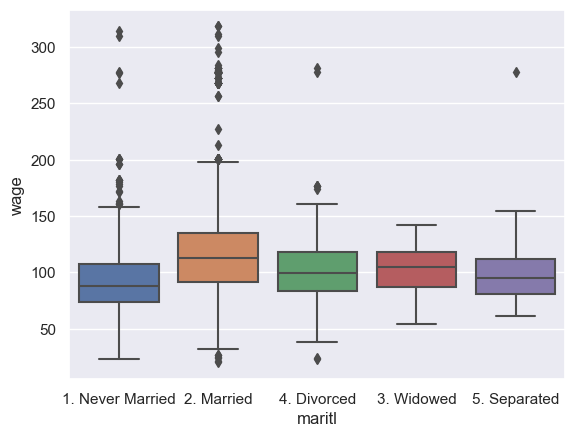

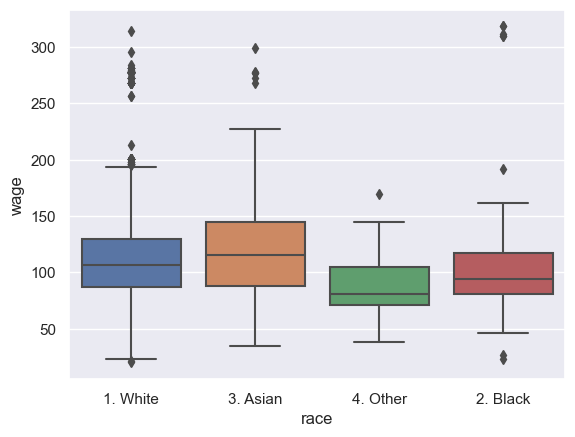

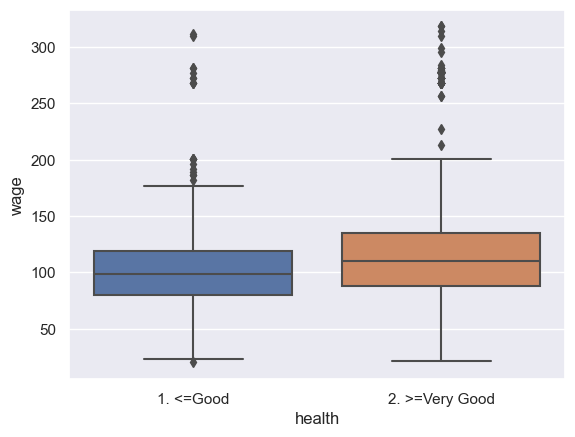

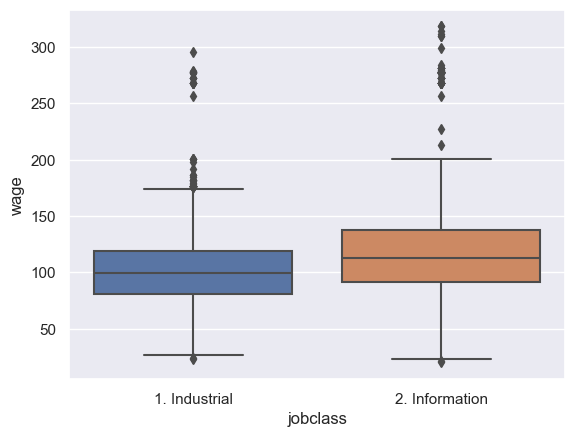

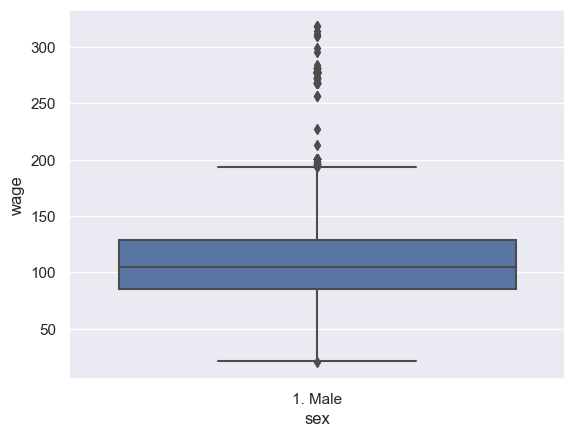

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [6]:
categoricals = ['maritl', 'race', 'health', 'jobclass','sex']
print("maritl\n", df['maritl'].value_counts())
print("race\n",df['race'].value_counts())
print("health\n", df['health'].value_counts())
print("jobclass\n", df['jobclass'].value_counts())
print("sex\n", df['sex'].value_counts())

for i in categoricals:
    sb.boxplot(x=df[i],y=df['wage'])
    plt.show()


df.describe()

In [7]:
X = df[['maritl', 'race', 'health', 'jobclass', 'sex']]
X = pd.get_dummies(data=X, drop_first=False)
X

,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,race_1. White,race_2. Black,race_3. Asian,race_4. Other,health_1. <=Good,health_2. >=Very Good,jobclass_1. Industrial,jobclass_2. Information,sex_1. Male
0,1,0,0,0,0,1,0,0,0,1,0,1,0,1
1,1,0,0,0,0,1,0,0,0,0,1,0,1,1
2,0,1,0,0,0,1,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,0,1,0,0,1,0,1,1
4,0,0,0,1,0,1,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,1,0,0,0,1,0,0,0,0,1,1,0,1
2996,0,1,0,0,0,1,0,0,0,0,1,1,0,1
2997,0,1,0,0,0,0,1,0,0,1,0,1,0,1
2998,1,0,0,0,0,1,0,0,0,0,1,1,0,1


3.
3a.

coef [-0.18208169  0.02192766 -0.000885  ]
intercept 0.9341280720211884


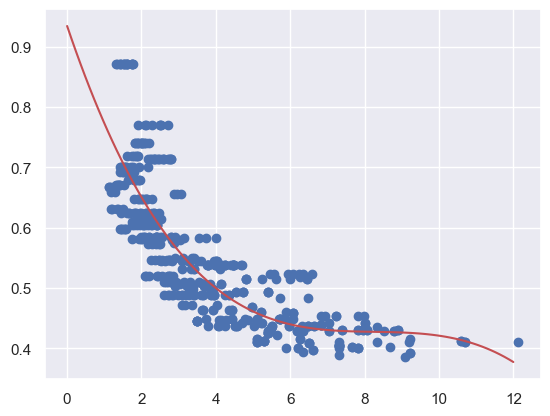

In [8]:
df = pd.read_csv('Boston.csv')
#pred = dis resp = nox
X= df['dis'].values.reshape(-1,1)
y =df['nox']
pip = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
pip.fit(X, y)
print("coef", pip[1].coef_[1:])
print("intercept", pip[1].intercept_)
space = np.linspace(0, 12, 100).reshape(-1,1)
ypred = pip.predict(space)
plt.scatter(X, y)
plt.plot(space, ypred, color="r")



3b.

Degree 1 RSS: 2.768562858969277


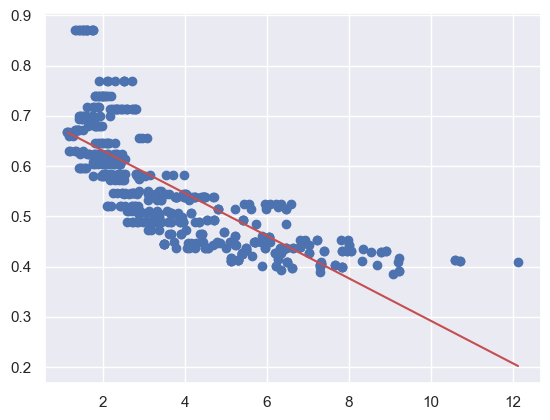

Degree 2 RSS: 2.0352618689352564


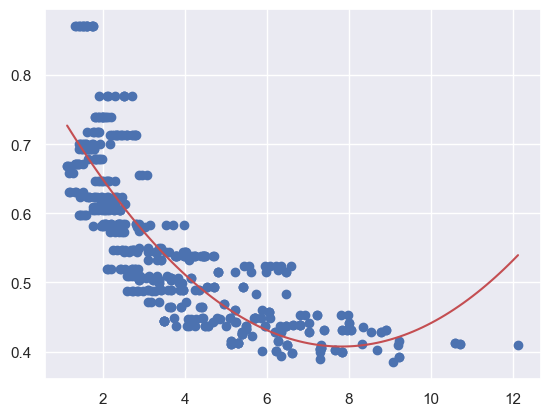

Degree 3 RSS: 1.9341067071790696


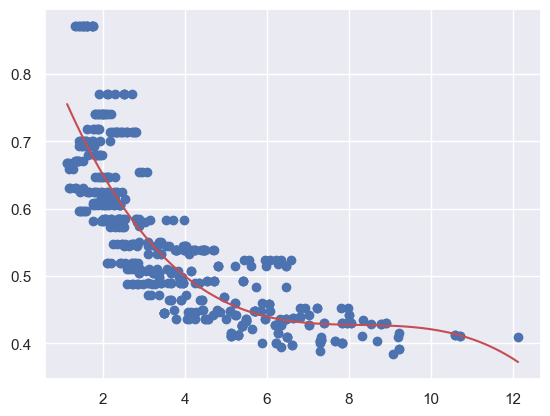

Degree 4 RSS: 1.932981327298597


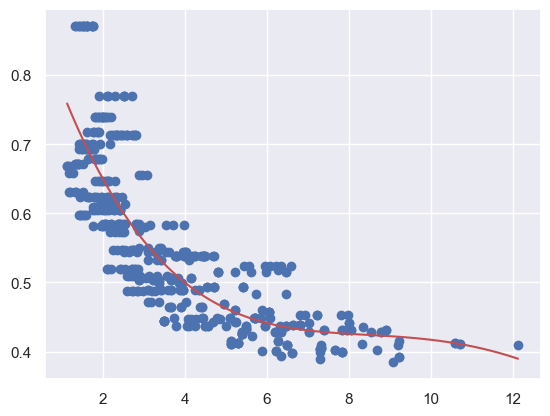

Degree 5 RSS: 1.9152899610843046


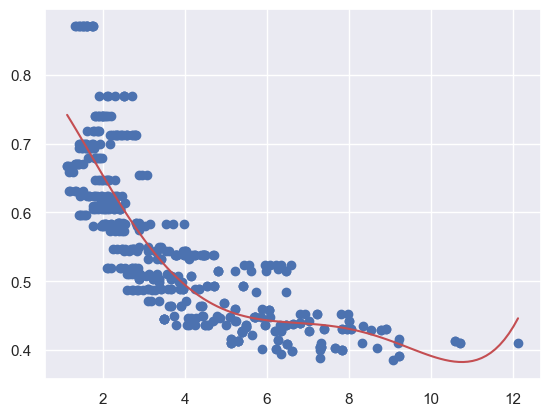

Degree 6 RSS: 1.8782572985081654


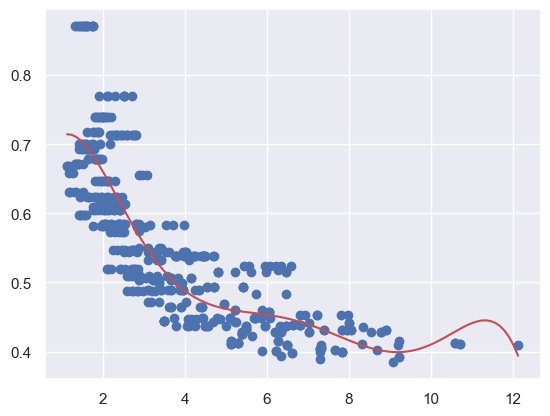

Degree 7 RSS: 1.8494836145829934


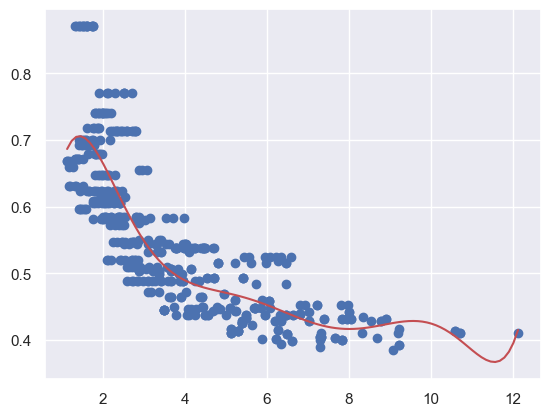

Degree 8 RSS: 1.8356296890675887


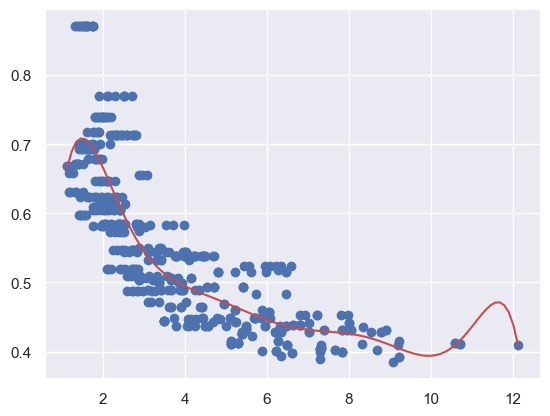

Degree 9 RSS: 1.8333308045143748


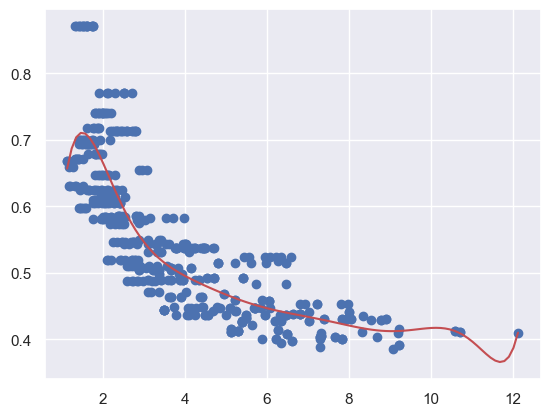

Degree 10 RSS: 1.8321711274176111


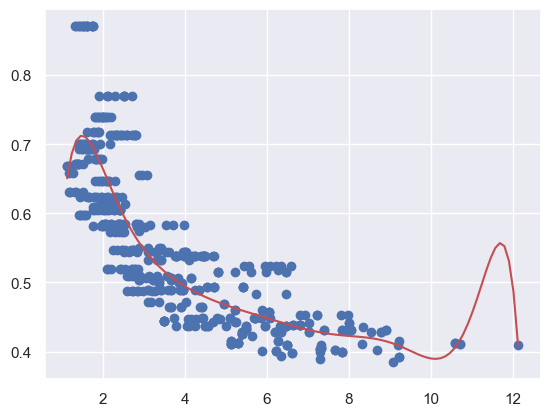

Degree with lowest RSS: 10


In [9]:
all_rss = []
space = np.linspace(min(X), max(X), 100).reshape(-1,1)
    
for i in range(1, 11):
    pip = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    pip.fit(X, y)
    ypred = pip.predict(X)
    rss = sum((y-ypred)**2)
    all_rss.append(rss)
    print("Degree", i, "RSS:", rss)
    plt.scatter(X, y)
    ypred = pip.predict(space)
    plt.plot(space, ypred, color="r")
    plt.show()

print("Degree with lowest RSS:", np.argmin(all_rss)+1)

3c.

In [10]:
all_cv = []
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=200)
    pip = make_pipeline(PolynomialFeatures(degree=i), LinearRegression())
    cv=cross_val_score(pip, X, y, cv=5, scoring='neg_mean_squared_error')
    all_cv.append(sum(cv)/len(cv))
for i, val in enumerate(all_cv):
    print("Degree:",i,"Avg Mean Squared Error:", -val)

print("Lowest MSE Degree:", np.argmax(all_cv)+1)
    

Degree: 0 Avg Mean Squared Error: 0.006032109223148159
Degree: 1 Avg Mean Squared Error: 0.004570384881436277
Degree: 2 Avg Mean Squared Error: 0.004647367459422983
Degree: 3 Avg Mean Squared Error: 0.004756118478674706
Degree: 4 Avg Mean Squared Error: 0.004969650255228574
Degree: 5 Avg Mean Squared Error: 0.02208332390018134
Degree: 6 Avg Mean Squared Error: 0.08601104447362791
Degree: 7 Avg Mean Squared Error: 2.4179944930280555
Degree: 8 Avg Mean Squared Error: 0.13094958662512546
Degree: 9 Avg Mean Squared Error: 84.65187016629548
Lowest MSE Degree: 2


According to the cross validation, degree 2 had the lowest average mean squared error across the our cross validation instances. 

3d.

In [31]:
X = df['dis']
df_cut, bins = pd.cut(X, 4, retbins=True, right=True)
df_steps = pd.concat([X, df_cut, y], keys=['dis', 'dis_cuts', 'nox'], axis=1)
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies

fit3 = sm.GLM(df_steps.nox, df_steps_dummies).fit()
bin_mapping = np.digitize(X, bins)
X_valid = pd.get_dummies(bin_mapping)
# Removing any outliers
X_valid = pd.get_dummies(bin_mapping).drop([5], axis=1)

# Prediction
pred2 = fit3.predict(X_valid)
# Calculating RMSE

rms = sqrt(mean_squared_error(y, pred2)) 
print(rms) 


# We will plot the graph for 70 observations only
xp = np.linspace(X.min(),X.max()-1,70) 
bin_mapping = np.digitize(xp, bins) 
X_valid_2 = pd.get_dummies(bin_mapping) 
pred2 = fit3.predict(X_valid_2)


0.08469614039730333


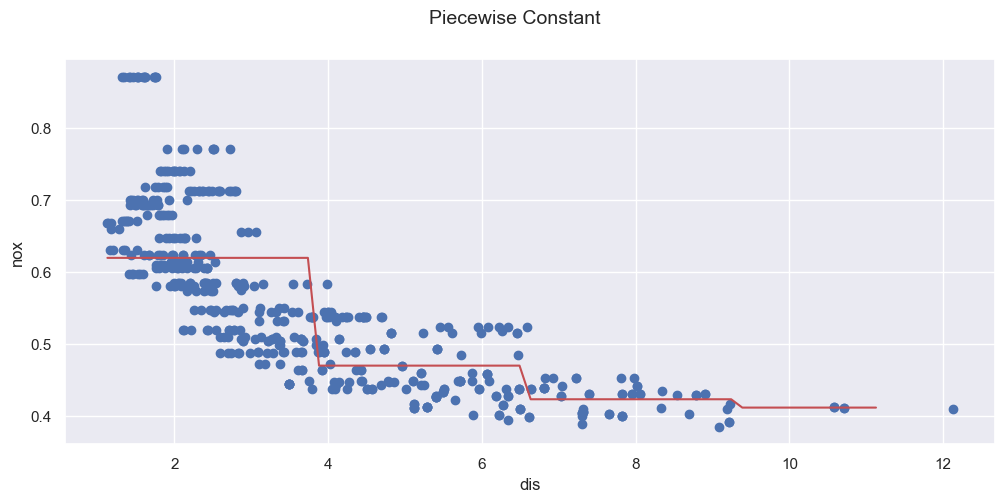

In [38]:
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
fig.suptitle('Piecewise Constant', fontsize=14)

# Scatter plot with polynomial regression line
ax1.scatter(X, y)
ax1.plot(xp, pred2, c='r')

ax1.set_xlabel('dis')
ax1.set_ylabel('nox')
plt.show()